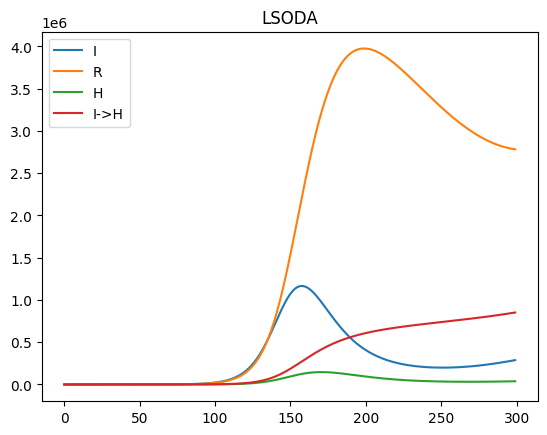

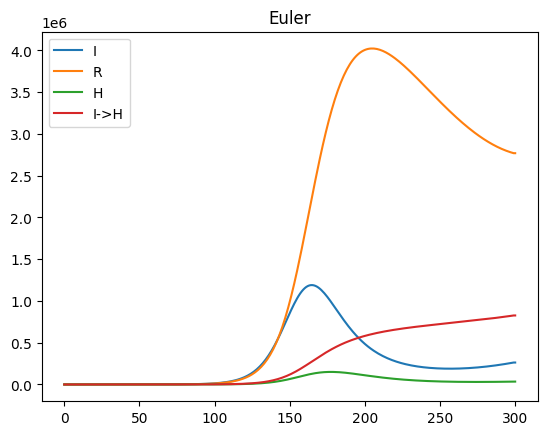

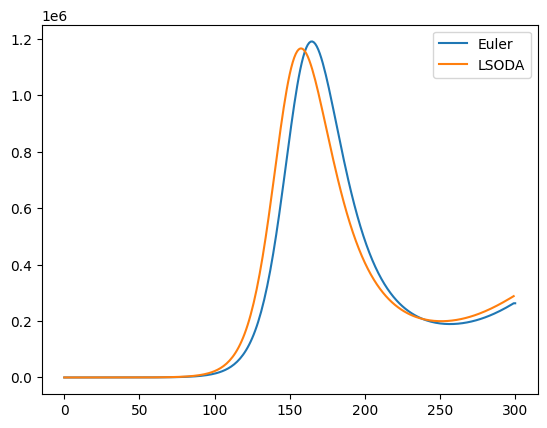

In [75]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def RHS_H(state,t,param):
    #params has all the parameters – beta, gamma
    #state is a numpy array

        S,I,R,H,new_H = state #unpack the state variables
        N = 7_000_000 #compute the total population 

        new_H = 1/param['D']*param['gamma'] * I

        '''The state transitions of the ODE model is below'''
        dS = -param['beta']*S*I/N + 1/param['L']*R 
        dI = param['beta']*S*I/N-1/param['D']*I
        dR = 1/param['hosp'] * H + 1/param['D']*(1-param['gamma'])*I-1/param['L']*R 
        dH = 1/param['D']*param['gamma'] * I - 1/param['hosp'] * H 

        return np.array([dS,dI,dR,dH,new_H])


t_span = np.linspace(0,300,300)
initial_infected = 1
y0 = [7_000_000-initial_infected,initial_infected,0,0,0]
params={
"beta":0.2,
"gamma":0.1,
"hosp":15,
"L":90,
"D":10}

result = odeint(func=RHS_H, t=t_span, y0=y0, args=(params,))

labels = ['S','I','R','H','I->H']
#plt.yscale('log')
plt.title('LSODA')
for i in range(1,5): 
    plt.plot(result[:,i],label=labels[i])
plt.legend()
plt.show()

dt=1
state = np.array([y0 for _ in range(301)],dtype=np.float_)

for i in range(1,300):
    for _ in range(int(1/dt)):
        d_RHS = RHS_H(state[i,:],0,params)
        state[i,:] += d_RHS*dt
        state[i+1,:] = state[i,:]

plt.title('Euler')
#plt.yscale('log')
for i in range(1,5): 
    plt.plot(state[:,i],label=labels[i])
plt.legend()
plt.show()

plt.plot(state[:,1],label="Euler")
plt.plot(result[:,1],label="LSODA")
plt.legend()


